<a href="https://www.kaggle.com/code/selimkoc/notebook2f4620f073?scriptVersionId=209239137" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [5]:
import numpy as np 
import pandas as pd 
import random
import seaborn as sns
import matplotlib.pyplot as plt
import geocoder

In [6]:
pd.set_option('display.max_columns', None)
data=pd.read_csv('/kaggle/input/airbnbopendata/Airbnb_Open_Data.csv')

/tmp/ipykernel_30/2555144767.py:2: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv('/kaggle/input/airbnbopendata/Airbnb_Open_Data.csv')


In [7]:
data.shape

(102599, 26)

In [8]:
data_part = data.iloc[:data.shape[0] // 3, :]
"""
The shape function returns the number of rows and columns in the DataFrame.
`data.shape[0]` retrieves the total number of rows.
The `//` operator performs integer division to divide the rows into three parts.
"""

'\nThe shape function returns the number of rows and columns in the DataFrame.\n`data.shape[0]` retrieves the total number of rows.\nThe `//` operator performs integer division to divide the rows into three parts.\n'

In [9]:
data_part.shape

(34199, 26)

In [10]:
def add_random_missing_values(dataframe: pd.DataFrame,
                              missing_rate: float = 0.05) -> pd.DataFrame:
    """Turns random values to NaN in a DataFrame.

    To use this function, you need to import pandas, numpy and random libraries.

    Args:
        dataframe (pd.DataFrame): DataFrame to be processed.
        missing_rate (float): Percentage of missing value rate in float format. Defaults 0.05

    Returns:
        df_missing (pd.DataFrame): Processed DataFrame object.

    """
    # Get copy of dataframe
    df_missing = dataframe.copy()

    # Obtain size of dataframe and number total number of missing values
    df_size = dataframe.size
    num_missing = int(df_size * missing_rate)

    # Get random row and column indexes to turn them NaN
    for _ in range(num_missing):
        row_idx = random.randint(0, dataframe.shape[0] - 1)
        col_idx = random.randint(0, dataframe.shape[1] - 1)

        df_missing.iat[row_idx, col_idx] = np.nan

    return df_missing

In [11]:
data_miss = add_random_missing_values(data_part,0.02)

In [12]:
# Count missing values per column
missing_values = data_miss.isnull().sum()

# Print columns with missing values
print(missing_values[missing_values > 0])

# Calculate the percentage of missing values per column
missing_percentage = (missing_values / len(data_part)) * 100
print(missing_percentage[missing_percentage > 0])


id                                  648
NAME                                806
host id                             719
host_identity_verified              787
host name                           888
neighbourhood group                 682
neighbourhood                       740
lat                                 688
long                                652
country                             741
country code                        761
instant_bookable                    752
cancellation_policy                 752
room type                           648
Construction year                   827
price                               778
service fee                         768
minimum nights                      866
number of reviews                   704
last review                        6095
reviews per month                  6088
review rate number                  799
calculated host listings count      778
availability 365                    863
house_rules                       11781


In [13]:
def summarize_dataset(data, num_head=5, num_tail=5, drop_columns=None, drop_duplicates=False):
    """
    Summarizes a DataFrame with additional type analysis and parameter validation.

    Parameters:
    data (DataFrame): The DataFrame to summarize.
    num_head (int): Specifies how many rows to display from the beginning.
    num_tail (int): Specifies how many rows to display from the end.
    drop_columns (list): List of columns to drop.
    drop_duplicates (bool): Used to remove duplicates from the DataFrame.

    Returns:
    DataFrame: The processed DataFrame.
    """
    # Parameter validation
    if not isinstance(data, pd.DataFrame):
        raise ValueError("The `data` parameter must be a pandas DataFrame.")
    if not isinstance(num_head, int) or num_head < 0:
        raise ValueError("The `num_head` parameter must be a non-negative integer.")
    if not isinstance(num_tail, int) or num_tail < 0:
        raise ValueError("The `num_tail` parameter must be a non-negative integer.")
    if drop_columns and not isinstance(drop_columns, list):
        raise ValueError("The `drop_columns` parameter must be a list of column names.")
    
    # Display the first few rows
    print(f"First {num_head} rows:")
    print(data.head(num_head))
    print("\n")
    
    # Display the last few rows
    print(f"Last {num_tail} rows:")
    print(data.tail(num_tail))
    print("\n")
    
    # Display column names and data types
    print("Columns and Data Types:")
    print(data.dtypes)
    print("\n")
    
    # Analyze categorical and numerical columns
    categorical_cols = data.select_dtypes(include=['object', 'category']).columns.tolist()
    numeric_cols = data.select_dtypes(include=['number']).columns.tolist()
    print(f"Categorical Columns: {categorical_cols}")
    print(f"Numeric Columns: {numeric_cols}")
    print("\n")
    
    # Check for missing values
    missing_values = data.isnull().sum()
    missing_columns = missing_values[missing_values > 0]
    print(f"Missing Values:\n{missing_columns}")
    print("\n")
    
    # Display statistical summary for numerical columns
    print("Statistical Summary:")
    print(data[numeric_cols].describe())
    print("\n")
    
    # Display the shape of the dataset
    print("Data Shape:")
    print(data.shape)
    print("\n")
    
    # Check for duplicate rows
    num_duplicates = data.duplicated().sum()
    print(f"Number of duplicated rows: {num_duplicates}")
    print("\n")

    # Drop duplicate rows if requested
    if drop_duplicates:
        initial_rows = data.shape[0]
        if drop_columns:
            data.drop_duplicates(subset=drop_columns, inplace=True)
        else:
            data.drop_duplicates(inplace=True)
        dropped_rows = initial_rows - data.shape[0]
        print(f"Number of dropped rows: {dropped_rows}")
    
    return data


In [14]:
summarize_dataset(data_miss)

First 5 rows:
          id                                              NAME       host id  \
0  1001254.0                Clean & quiet apt home by the park  8.001449e+10   
1  1002102.0                             Skylit Midtown Castle  5.233517e+10   
2  1002403.0               THE VILLAGE OF HARLEM....NEW YORK !  7.882924e+10   
3  1002755.0                                               NaN  8.509833e+10   
4  1003689.0  Entire Apt: Spacious Studio/Loft by central park  9.203760e+10   

  host_identity_verified host name neighbourhood group neighbourhood  \
0            unconfirmed  Madaline            Brooklyn    Kensington   
1               verified     Jenna           Manhattan       Midtown   
2                    NaN     Elise           Manhattan        Harlem   
3            unconfirmed       NaN            Brooklyn  Clinton Hill   
4               verified    Lyndon           Manhattan           NaN   

        lat      long        country country code instant_bookable  \
0 

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,country code,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254.0,Clean & quiet apt home by the park,8.001449e+10,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,US,False,strict,Private room,2020.0,$966,$193,NaN,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102.0,Skylit Midtown Castle,5.233517e+10,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,US,False,moderate,Entire home/apt,2007.0,$142,$28,30.0,45.0,5/21/2022,0.38,NaN,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403.0,THE VILLAGE OF HARLEM....NEW YORK !,7.882924e+10,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,US,True,flexible,Private room,2005.0,$620,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755.0,NaN,8.509833e+10,unconfirmed,NaN,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,US,True,moderate,Entire home/apt,2005.0,$368,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689.0,Entire Apt: Spacious Studio/Loft by central park,9.203760e+10,verified,Lyndon,Manhattan,NaN,40.79851,-73.94399,NaN,US,False,moderate,Entire home/apt,2009.0,$204,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34194,19886682.0,ENTIRE APARTMENT: BRIGHT & CHARMING- best loca...,6.199416e+10,verified,Paloma,Manhattan,East Village,40.72338,-73.98346,United States,US,False,flexible,Entire home/apt,2014.0,$938,$188,2.0,14.0,7/7/2019,1.39,5.0,2.0,5.0,"WHEN BOOKING, PLEASE PROVIDE THE FOLLOWING IN ...",NaN
34195,19887235.0,Luxury basement apartment in newly built house,8.686235e+10,verified,Ester,Queens,Fresh Meadows,40.73920,-73.79181,United States,US,True,flexible,Entire home/apt,2022.0,$407,$81,1.0,1.0,8/17/2018,0.09,2.0,1.0,363.0,No parties. No loud music or noise late at nig...,NaN
34196,19887787.0,Suite 18 - Cozy room w/ Private Bathroom,6.136332e+10,verified,Daisy,Brooklyn,Brighton Beach,40.57987,-73.95889,United States,US,False,moderate,Private room,2005.0,$463,$93,1.0,43.0,5/27/2019,3.82,2.0,5.0,283.0,No Smoking. No pets except by special arrange...,NaN
34197,19888339.0,Room available in spacious apartment UWS,4.099341e+10,unconfirmed,Claudia,Manhattan,Upper West Side,40.78493,-73.97683,United States,US,False,moderate,Private room,2011.0,$271,$54,4.0,4.0,1/2/2019,0.42,2.0,1.0,0.0,"No pet, No smoking - Quite hours : 9pm - 8am",NaN


# Data Cleaning

In [15]:
df_temp = data_miss.copy()

In [16]:
# Rename columns to standardize them, avoiding potential issues with case sensitivity and spaces in column names
df_temp.columns = [col.lower().replace(" ","_") for col in df_temp.columns]

In [17]:
df_temp.columns

Index(['id', 'name', 'host_id', 'host_identity_verified', 'host_name',
       'neighbourhood_group', 'neighbourhood', 'lat', 'long', 'country',
       'country_code', 'instant_bookable', 'cancellation_policy', 'room_type',
       'construction_year', 'price', 'service_fee', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'review_rate_number', 'calculated_host_listings_count',
       'availability_365', 'house_rules', 'license'],
      dtype='object')

In [18]:
# Remove dollar sign and commas, then convert to float
df_temp['price'] = df_temp['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)
df_temp['service_fee'] = df_temp['service_fee'].replace({'\$': '', ',': ''}, regex=True).astype(float)


In [19]:
df_temp.head(5)

,id,name,host_id,host_identity_verified,host_name,neighbourhood_group,neighbourhood,lat,long,country,country_code,instant_bookable,cancellation_policy,room_type,construction_year,price,service_fee,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365,house_rules,license
0,1001254.0,Clean & quiet apt home by the park,8.001449e+10,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,US,False,strict,Private room,2020.0,966.0,193.0,NaN,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102.0,Skylit Midtown Castle,5.233517e+10,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,US,False,moderate,Entire home/apt,2007.0,142.0,28.0,30.0,45.0,5/21/2022,0.38,NaN,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403.0,THE VILLAGE OF HARLEM....NEW YORK !,7.882924e+10,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,US,True,flexible,Private room,2005.0,620.0,124.0,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755.0,NaN,8.509833e+10,unconfirmed,NaN,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,US,True,moderate,Entire home/apt,2005.0,368.0,74.0,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689.0,Entire Apt: Spacious Studio/Loft by central park,9.203760e+10,verified,Lyndon,Manhattan,NaN,40.79851,-73.94399,NaN,US,False,moderate,Entire home/apt,2009.0,204.0,41.0,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [20]:
# Convert 'last review' column to datetime
df_temp['last_review'] = pd.to_datetime(df_temp['last_review'], errors='coerce')
df_temp['last_review'].head()

0   2021-10-19
1   2022-05-21
2          NaT
3   2019-07-05
4   2018-11-19
Name: last_review, dtype: datetime64[ns]

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


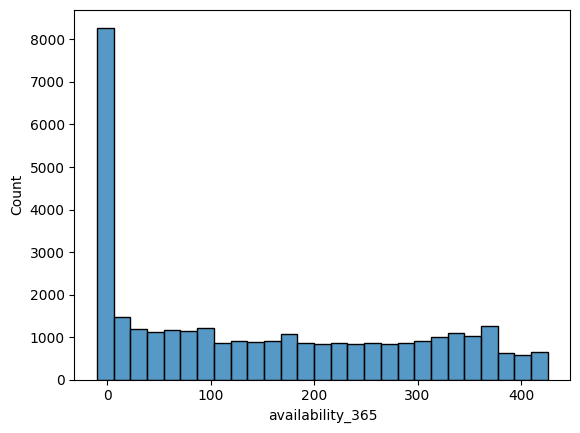

In [21]:
sns.histplot(df_temp['availability_365'])
plt.show()

In [22]:
df_temp['host_name'].value_counts() #we dont have unique names so we cant drop host_id

host_name
Michael       293
David         264
John          196
Sarah         181
Alex          175
             ... 
Kazuhiro        1
DJ Timothy      1
Rebeka          1
Kensey          1
Kristiina       1
Name: count, Length: 8663, dtype: int64

In [23]:
df_temp['country_code'] 
df_temp['country_code'].value_counts()  # Dropping the 'country_code' column as it doesn't provide any meaningful insights

country_code
US    33438
Name: count, dtype: int64

In [24]:
df_temp['house_rules'] # Dropping the 'house_rules' column since I am not gonna work with text data

0        Clean up and treat the home the way you'd like...
1        Pet friendly but please confirm with me if the...
2        I encourage you to use my kitchen, cooking and...
3                                                      NaN
4        Please no smoking in the house, porch or on th...
                               ...                        
34194    WHEN BOOKING, PLEASE PROVIDE THE FOLLOWING IN ...
34195    No parties. No loud music or noise late at nig...
34196    No Smoking.  No pets except by special arrange...
34197        No pet, No smoking - Quite hours : 9pm - 8am 
34198    No smoking please, no pets to protect our hard...
Name: house_rules, Length: 34199, dtype: object

In [25]:
df_temp['license'] 
df_temp['license'].value_counts()  # We can drop this column 

license
41662/AL    1
Name: count, dtype: int64

In [26]:
df_temp['country'] 
df_temp['country'].value_counts() # We can drop this column too

country
United States    33458
Name: count, dtype: int64

In [27]:
# Drop columns with insufficient data
columns_to_drop = ['country_code',"country",'house_rules','license']
df_temp = df_temp.drop(columns_to_drop, axis=1)

In [28]:
df_temp.columns

Index(['id', 'name', 'host_id', 'host_identity_verified', 'host_name',
       'neighbourhood_group', 'neighbourhood', 'lat', 'long',
       'instant_bookable', 'cancellation_policy', 'room_type',
       'construction_year', 'price', 'service_fee', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'review_rate_number', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

# Handling Missing Data


In [29]:
df_temp.isna().sum()

id                                 648
name                               806
host_id                            719
host_identity_verified             787
host_name                          888
neighbourhood_group                682
neighbourhood                      740
lat                                688
long                               652
instant_bookable                   752
cancellation_policy                752
room_type                          648
construction_year                  827
price                              778
service_fee                        768
minimum_nights                     866
number_of_reviews                  704
last_review                       6095
reviews_per_month                 6088
review_rate_number                 799
calculated_host_listings_count     778
availability_365                   863
dtype: int64

### **name**

In [30]:
# For the name column we can scrape data on the google maps to find the data but this is not that big project so I just fill with "Unknown"
df_temp['name']=df_temp['name'].fillna('Unknown')

### **host_id**

In [31]:
df_temp['host_id'] = df_temp['host_id'].fillna(0)

### **host_identity_verified**

In [32]:
df_temp['host_identity_verified'].value_counts()

host_identity_verified
unconfirmed    16786
verified       16626
Name: count, dtype: int64

In [33]:
df_temp['host_identity_verified'] = df_temp['host_identity_verified'].fillna('unconfirmed')

### **host_name**

In [34]:
# Count occurrences of 'host_id'
host_id_counts = df_temp['host_id'].value_counts()

# Filter for 'host_id's that appear more than once
host_ids_multiple_occurrences = host_id_counts[host_id_counts > 1]
# host_ids_multiple_occurrences is null
# Trying to check if there are any 'host_id's with missing 'host_name'. 
# If the 'host_id' is the same, we could potentially fill the missing 'host_name' from the matching rows.
# However, since no matches were found, I will replace the 'null' values of 'host_name' with 'Unknown'.

df_temp['host_name']=df_temp['host_name'].fillna('Unknown')

### **neighbourhood_group**

In [35]:
df_temp['neighbourhood_group'].value_counts()

neighbourhood_group
Manhattan        14827
Brooklyn         14419
Queens            3414
Bronx              623
Staten Island      232
brookln              1
manhatan             1
Name: count, dtype: int64

In [36]:
# Correcting the spelling of 'neighbourhood group' values in the DataFrame
df_temp.loc[df_temp['neighbourhood_group']=='manhatan', 'neighbourhood_group'] = 'Manhattan'
df_temp.loc[df_temp['neighbourhood_group']=='brookln', 'neighbourhood_group'] = 'Brooklyn'
df_temp['neighbourhood_group'].value_counts()

neighbourhood_group
Manhattan        14828
Brooklyn         14420
Queens            3414
Bronx              623
Staten Island      232
Name: count, dtype: int64

In [37]:
df_temp['neighbourhood_group'].isna().sum()

682

In [38]:
def get_neighbourhood(lat, long):
    g = geocoder.osm([lat, long], method='reverse')
    if g and g.raw:  # Check if a valid response is received
        #print(g.raw.get('address', {}).get('suburb', ''))
        return g.raw.get('address', {}).get('suburb', '')
    return "Unknown"  # Return a default value if the response is invalid


In [39]:
# Filter rows where 'neighbourhood_group' is null
missing_neighbourhood_idx = df_temp['neighbourhood_group'].isnull()

# Check if 'lat' or 'long' are null only for these rows
missing_lat_long = df_temp.loc[missing_neighbourhood_idx, ['lat', 'long']].isnull().any(axis=1)

# Debug: Print counts of missing lat/long for neighbourhood_group null rows
print(missing_lat_long.value_counts())


False    646
True      36
Name: count, dtype: int64


In [40]:
invalid_rows = missing_neighbourhood_idx & missing_lat_long

if invalid_rows.any():
    invalid_indices = invalid_rows[invalid_rows].index.tolist()
    print(f"Warning: Some rows have both 'neighbourhood_group' and either 'lat' or 'long' missing. (Indices: {invalid_indices})")
    # Optionally, we can drop these rows to get a clean data
    df_temp = df_temp[~invalid_rows]

In [41]:
# For rows where 'neighbourhood_group' is null but 'lat' and 'long' are available, apply the function
df_temp.loc[missing_neighbourhood_idx & ~missing_lat_long, 'neighbourhood_group'] = (
    df_temp.loc[missing_neighbourhood_idx & ~missing_lat_long]
    .apply(lambda x: get_neighbourhood(x.lat, x.long), axis=1)
)

In [42]:
df_temp['neighbourhood_group'].isna().sum()

0

### **neighbourhood & lat & long**

In [44]:
df_temp['neighbourhood'].value_counts()

neighbourhood
Williamsburg          2881
Bedford-Stuyvesant    2530
Harlem                1938
Bushwick              1638
Upper West Side       1471
                      ... 
West Farms               1
Richmondtown             1
Huguenot                 1
New Dorp Beach           1
Willowbrook              1
Name: count, Length: 220, dtype: int64

In [45]:
df_temp['neighbourhood'].isna().sum()

738

In [46]:
df_temp["lat"].describe()

count    33495.000000
mean        40.728858
std          0.054303
min         40.499790
25%         40.689170
50%         40.722410
75%         40.763730
max         40.911690
Name: lat, dtype: float64

In [47]:
df_temp["lat"].isna().sum()

668

In [48]:
df_temp["long"].describe()

count    33528.000000
mean       -73.953902
std          0.043101
min        -74.242850
25%        -73.982550
50%        -73.956310
75%        -73.938997
max        -73.712990
Name: long, dtype: float64

In [49]:
df_temp["long"].isna().sum()

635

In [50]:
# The distance between coordinates is not significantly large,
# I am leaving them as is(It can also be drop). Using a technique similar to what I applied for 'neighbourhood group', 
# these values can easily be filled or adjusted by geocoding or looking up the corresponding neighbourhood based on the coordinates.


### **instant_bookable**

In [51]:
df_temp["instant_bookable"].isna().sum()

751

In [52]:
# We can fill the null values in 'instant_bookable' with either True or False.
# I will choose to fill with True, as it might be more beneficial for the hosts
df_temp['instant_bookable'] = df_temp['instant_bookable'].fillna('True')

### **cancellation_policy**

In [53]:
df_temp["cancellation_policy"].value_counts()

cancellation_policy
moderate    11210
flexible    11135
strict      11069
Name: count, dtype: int64

In [54]:
df_temp["cancellation_policy"].isna().sum()

749

In [55]:
# We can fill the null values in 'instant_bookable' with either 'moderate ', 'flexible' and 'strict'.
# I will choose to fill with True, as it might be more beneficial for the hosts and guests.
df_temp["cancellation_policy"].fillna('moderate')

0          strict
1        moderate
2        flexible
3        moderate
4        moderate
           ...   
34194    flexible
34195    flexible
34196    moderate
34197    moderate
34198    moderate
Name: cancellation_policy, Length: 34163, dtype: object

### **room_type**

In [56]:
df_temp["room_type"].value_counts()

room_type
Entire home/apt    17673
Private room       15216
Shared room          627
Name: count, dtype: int64

In [57]:
df_temp["room_type"].isna().sum()
df_temp["room_type"].fillna('Unknown')

0           Private room
1        Entire home/apt
2           Private room
3        Entire home/apt
4        Entire home/apt
              ...       
34194    Entire home/apt
34195    Entire home/apt
34196       Private room
34197       Private room
34198       Private room
Name: room_type, Length: 34163, dtype: object

### **construction_year**

In [58]:
df_temp["construction_year"].value_counts()

construction_year
2008.0    1708
2019.0    1702
2014.0    1693
2012.0    1690
2010.0    1685
2006.0    1682
2022.0    1677
2005.0    1674
2009.0    1672
2017.0    1670
2015.0    1668
2007.0    1659
2003.0    1658
2021.0    1657
2004.0    1651
2011.0    1646
2013.0    1644
2020.0    1643
2018.0    1643
2016.0    1616
Name: count, dtype: int64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


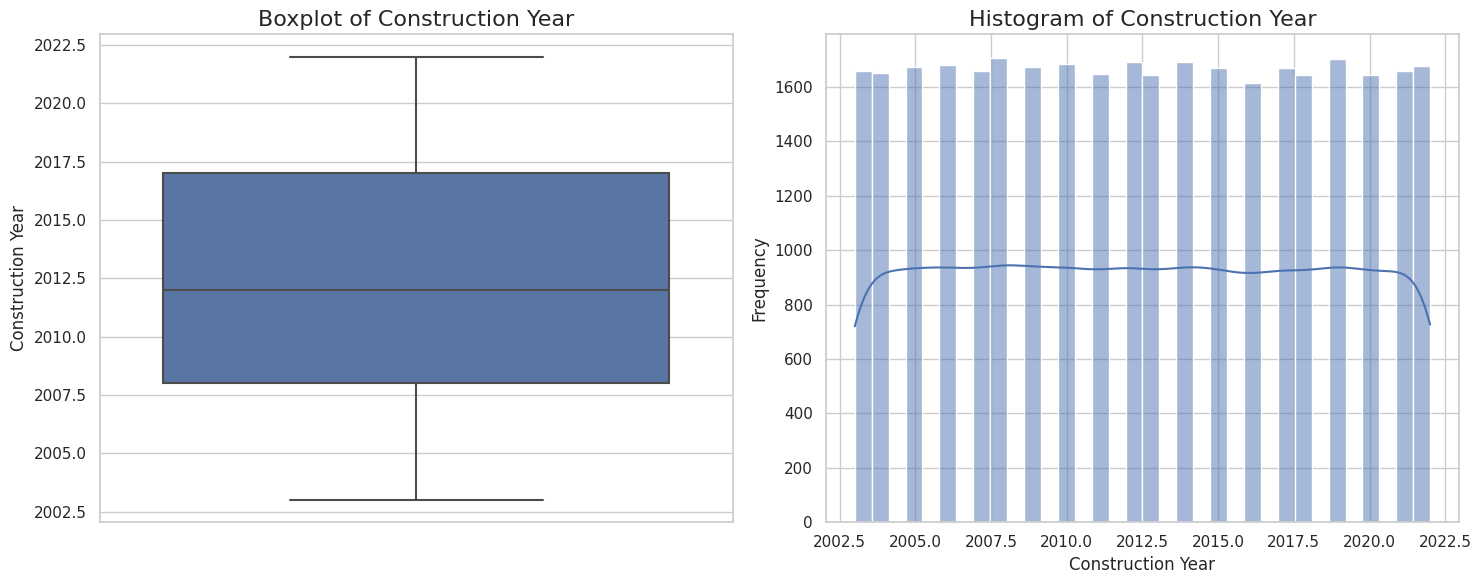

In [59]:
sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))  # 1 row, 2 columns

# Boxplot
sns.boxplot(y=df_temp['construction_year'], ax=axes[0])
axes[0].set_title("Boxplot of Construction Year", fontsize=16)
axes[0].set_ylabel("Construction Year", fontsize=12)

# Histogram with KDE
sns.histplot(df_temp['construction_year'], kde=True, ax=axes[1])
axes[1].set_title("Histogram of Construction Year", fontsize=16)
axes[1].set_xlabel("Construction Year", fontsize=12)
axes[1].set_ylabel("Frequency", fontsize=12)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


In [60]:
# Data looks balanced and their is no outline value so I can fill the null values with median values
median_value = df_temp["construction_year"].median()
df_temp["construction_year"].fillna(median_value, inplace=True)

/tmp/ipykernel_30/3365210524.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_temp["construction_year"].fillna(median_value, inplace=True)


In [61]:
df_temp['construction_year'] = df_temp['construction_year'].astype(int)

In [62]:
df_temp['construction_year'].isna().sum()

0

### **price & service_fee**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


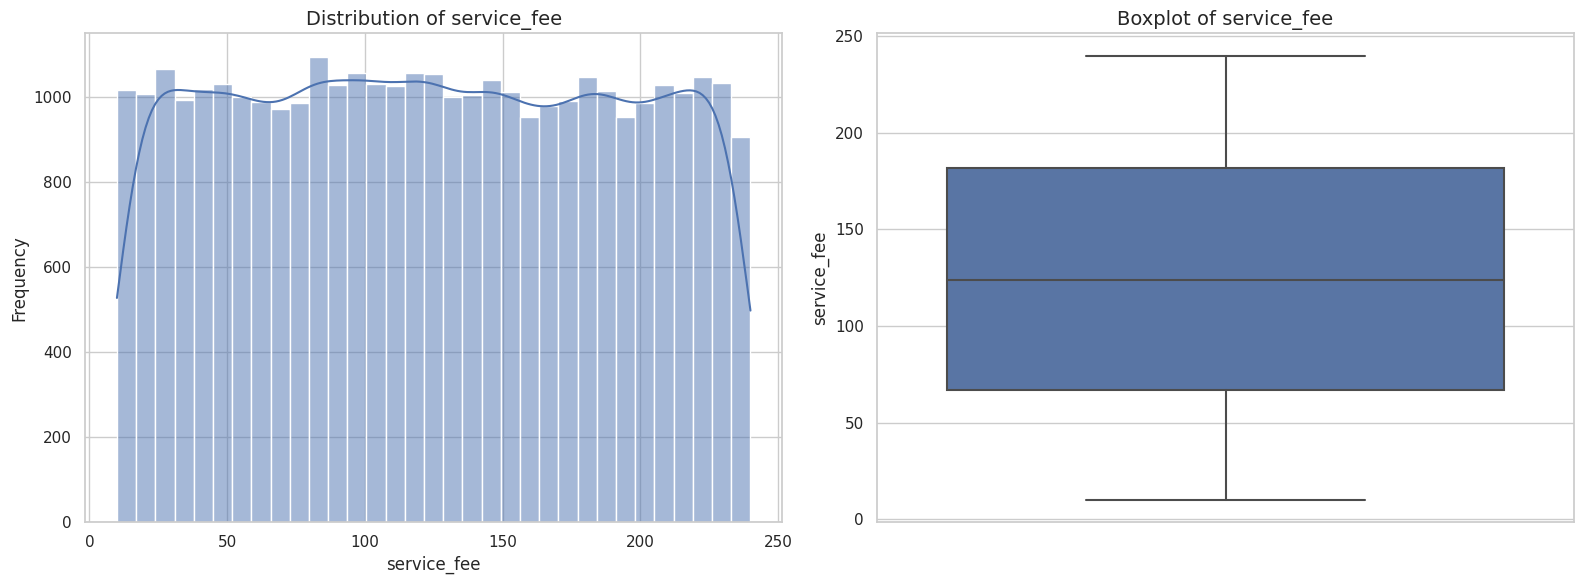

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


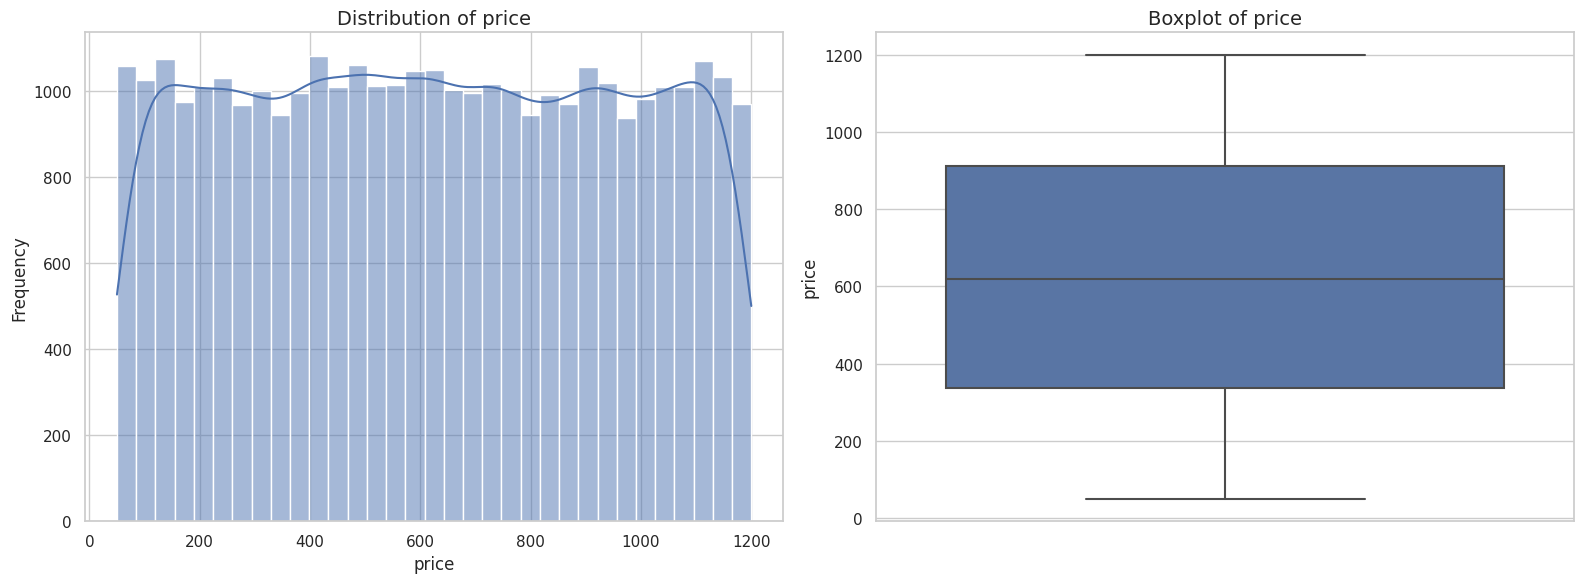

In [63]:
# List of selected columns to plot
selected_cols = ['service_fee', 'price']

# Plot each column separately with histogram and boxplot
for col in selected_cols:
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # Create two plots side by side

    # Histogram with KDE
    sns.histplot(df_temp[col], kde=True, ax=axes[0])
    axes[0].set_title(f'Distribution of {col}', fontsize=14)
    axes[0].set_xlabel(col, fontsize=12)
    axes[0].set_ylabel('Frequency', fontsize=12)

    # Boxplot
    sns.boxplot(y=df_temp[col], ax=axes[1])
    axes[1].set_title(f'Boxplot of {col}', fontsize=14)
    axes[1].set_ylabel(col, fontsize=12)

    # Show the plots
    plt.tight_layout()
    plt.show()


In [64]:
# Fill the columns with median (balanced data)
df_temp['price'] = df_temp['price'].fillna(df_temp['price'].median())
df_temp['service_fee'] = df_temp['service_fee'].fillna(df_temp['service_fee'].median())


## **number_of_reviews**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


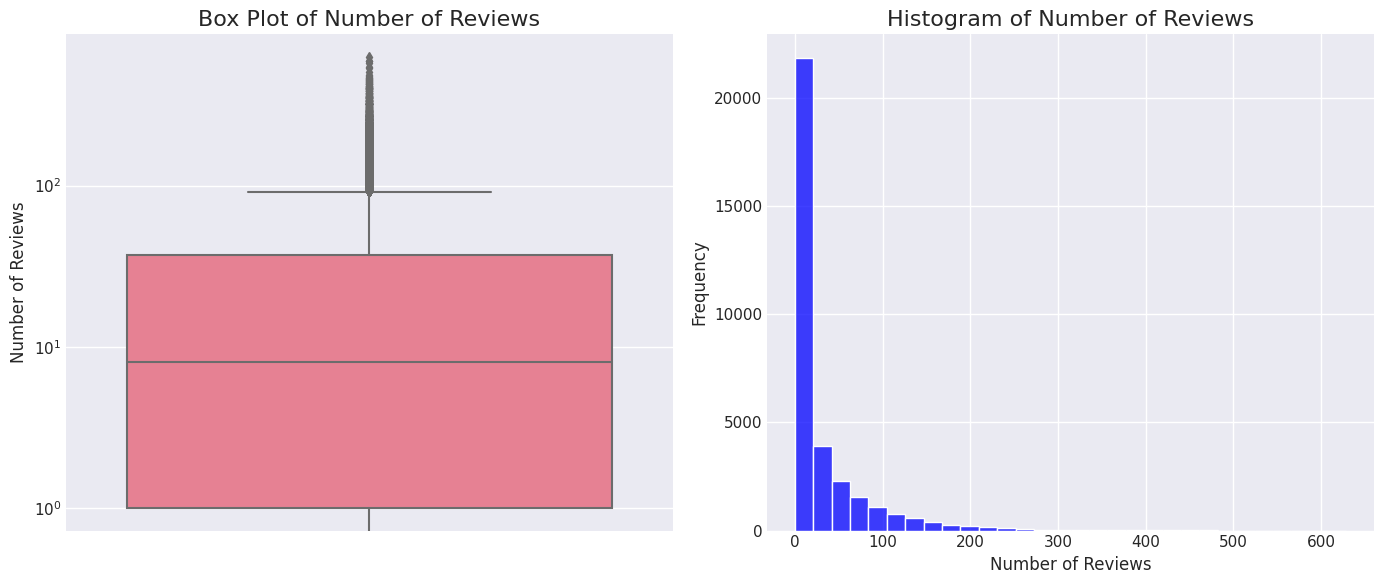

In [115]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.boxplot(data=df_temp, y='number_of_reviews', ax=axes[0])
axes[0].set_yscale('log')  # Set the y-axis to log scale
axes[0].set_title('Box Plot of Number of Reviews', fontsize=16)
axes[0].set_ylabel('Number of Reviews', fontsize=12)
sns.histplot(df_temp['number_of_reviews'], kde=False, color='blue', bins=30, ax=axes[1])
axes[1].set_title('Histogram of Number of Reviews', fontsize=16)
axes[1].set_xlabel('Number of Reviews', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()


In [118]:
df_temp['number_of_reviews'] = df_temp['number_of_reviews'].fillna(df_temp['number_of_reviews'])

In [119]:
df_temp.isna().sum()

id                                 647
name                                 0
host_id                              0
host_identity_verified               0
host_name                            0
neighbourhood_group                  0
neighbourhood                      738
lat                                668
long                               635
instant_bookable                     0
cancellation_policy                749
room_type                          647
construction_year                    0
price                                0
service_fee                          0
minimum_nights                     866
number_of_reviews                    0
last_review                       6092
reviews_per_month                 6084
review_rate_number                 796
calculated_host_listings_count     776
availability_365                   862
dtype: int64

In [43]:
# I will export this DataFrame to a CSV file.
df_temp.to_csv('output.csv', index=False)  

In [67]:
clean_data = df_temp.copy()

# Visualization

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Williamsburg'),
  Text(1, 0, 'Bedford-Stuyvesant'),
  Text(2, 0, 'Harlem'),
  Text(3, 0, 'Bushwick'),
  Text(4, 0, 'Upper West Side'),
  Text(5, 0, 'East Village'),
  Text(6, 0, 'Upper East Side'),
  Text(7, 0, 'Crown Heights'),
  Text(8, 0, "Hell's Kitchen"),
  Text(9, 0, 'Midtown')])

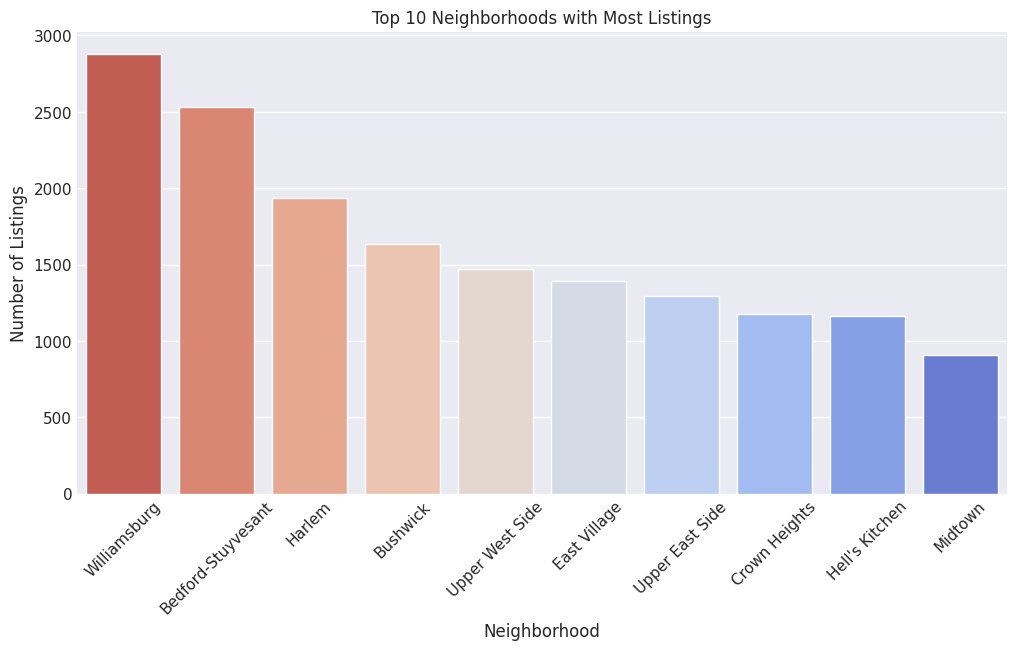

In [73]:
# The top 10 neighborhoods with the most listings
plt.style.use('seaborn-v0_8-darkgrid')
plt.figure(figsize=(12, 6))
neighborhood_host_counts = clean_data['neighbourhood'].value_counts().head(10)
sns.barplot(x=neighborhood_host_counts.index, y=neighborhood_host_counts.values, palette='coolwarm_r')
plt.title("Top 10 Neighborhoods with Most Listings")
plt.xlabel("Neighborhood")
plt.ylabel("Number of Listings")
plt.xticks(rotation=45)


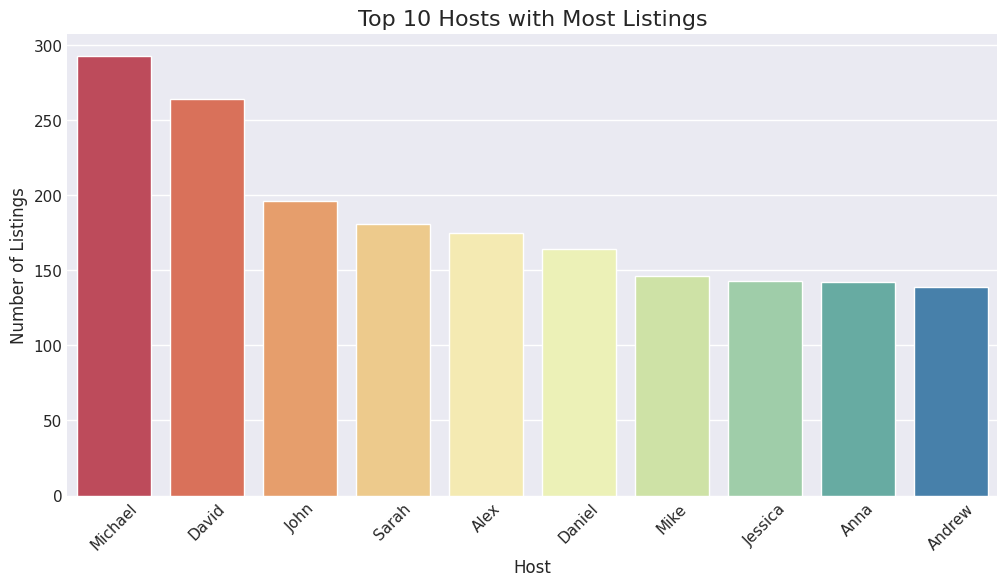

In [82]:
# The top 10 Hosts with Most Listings
# Filter out rows where host_name is 'unknown'
filtered_data = clean_data[clean_data['host_name'] != 'Unknown']

# Recalculate top hosts
top_hosts = filtered_data['host_name'].value_counts().head(10)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_hosts.index, y=top_hosts.values, palette='Spectral')
plt.title("Top 10 Hosts with Most Listings", fontsize=16)
plt.xlabel("Host")
plt.ylabel("Number of Listings")
plt.xticks(rotation=45)
plt.show()

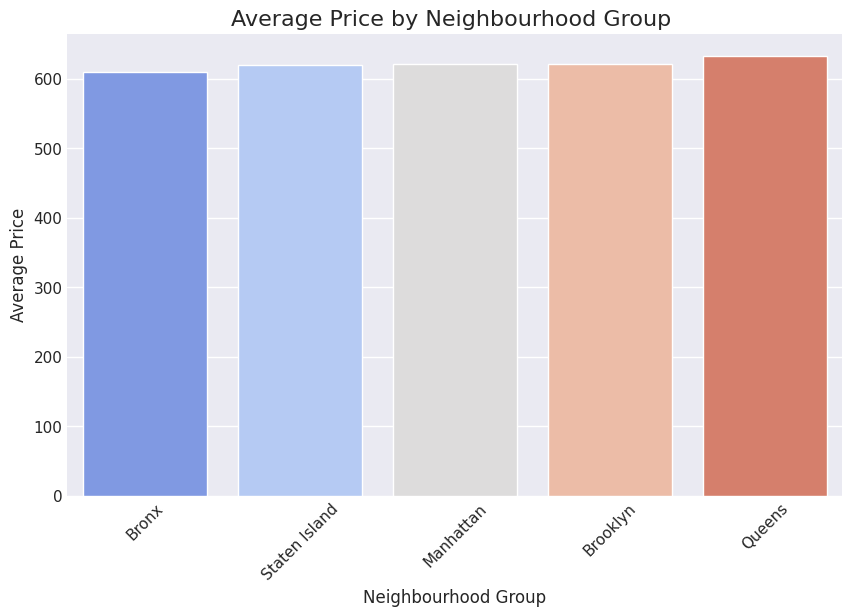

In [91]:
# Average Price by Neighbourhood Group
avg_price_neighbourhood_group = clean_data.groupby('neighbourhood_group')['price'].mean().sort_values()

# Filter out rows where neighbourhood_group is 'unknown'
filtered_data = avg_price_neighbourhood_group[avg_price_neighbourhood_group.index != 'Unknown']

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=filtered_data.index, y=filtered_data.values, palette='coolwarm')
plt.title('Average Price by Neighbourhood Group ', fontsize=16)
plt.xlabel('Neighbourhood Group', fontsize=12)
plt.ylabel('Average Price', fontsize=12)
plt.xticks(rotation=45)
plt.show()


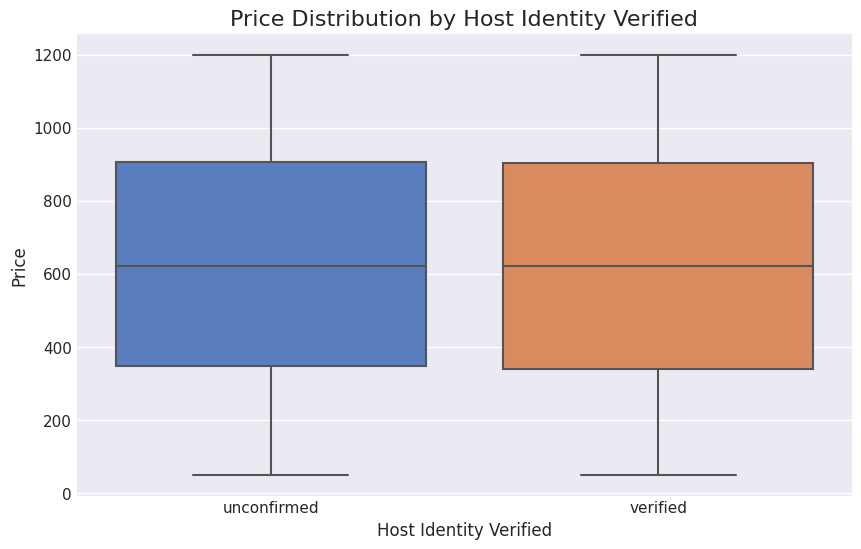

In [86]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='host_identity_verified', y='price', data=clean_data, palette='muted')
plt.title('Price Distribution by Host Identity Verified', fontsize=16)
plt.xlabel('Host Identity Verified', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.show()


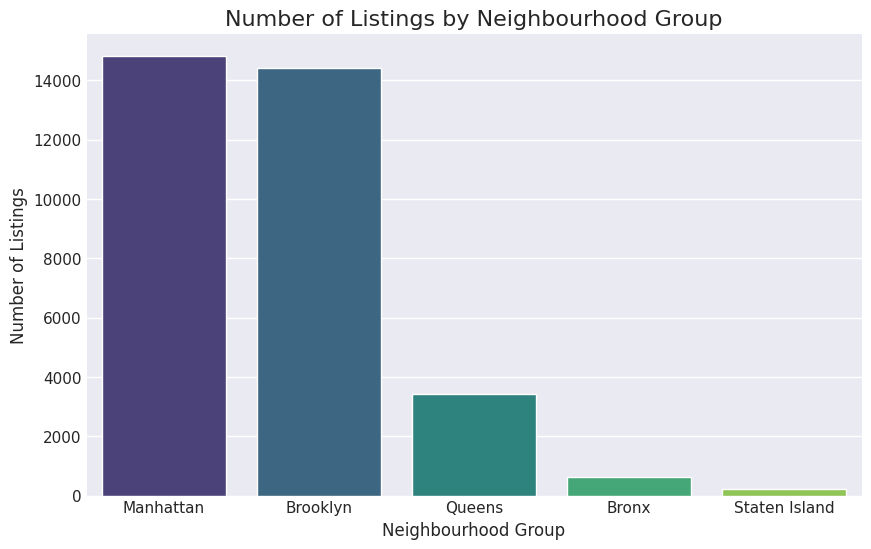

In [92]:
# Neighbourhood group için listeleme sayılarını al ve 'Unknown' değerini kaldır
neighbourhood_group_counts = clean_data['neighbourhood_group'].value_counts()

# 'Unknown' değerini kaldır
filtered_counts = neighbourhood_group_counts[neighbourhood_group_counts.index != 'Unknown']

# Görselleştirme
plt.figure(figsize=(10, 6))
sns.barplot(x=filtered_counts.index, y=filtered_counts.values, palette='viridis')
plt.title('Number of Listings by Neighbourhood Group', fontsize=16)
plt.xlabel('Neighbourhood Group', fontsize=12)
plt.ylabel('Number of Listings', fontsize=12)
plt.show()


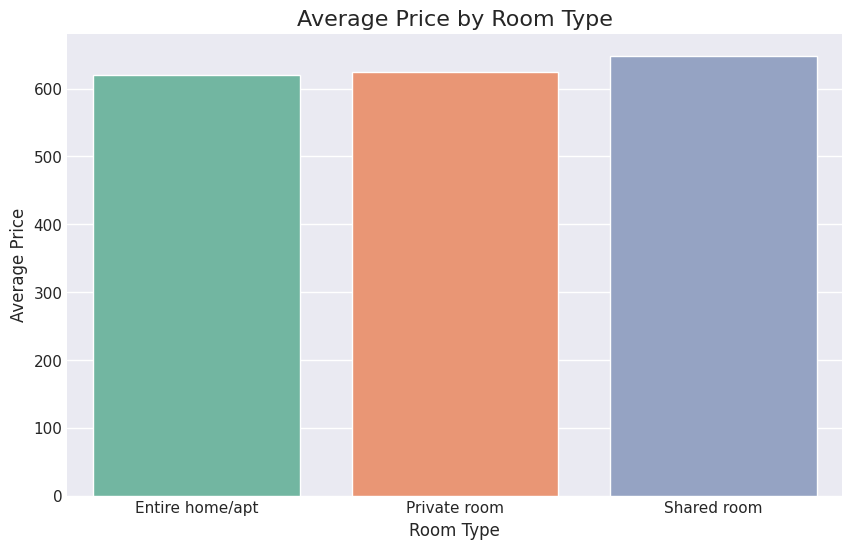

In [88]:
avg_price_room_type = clean_data.groupby('room_type')['price'].mean().sort_values()

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_price_room_type.index, y=avg_price_room_type.values, palette='Set2')
plt.title('Average Price by Room Type', fontsize=16)
plt.xlabel('Room Type', fontsize=12)
plt.ylabel('Average Price', fontsize=12)
plt.show()


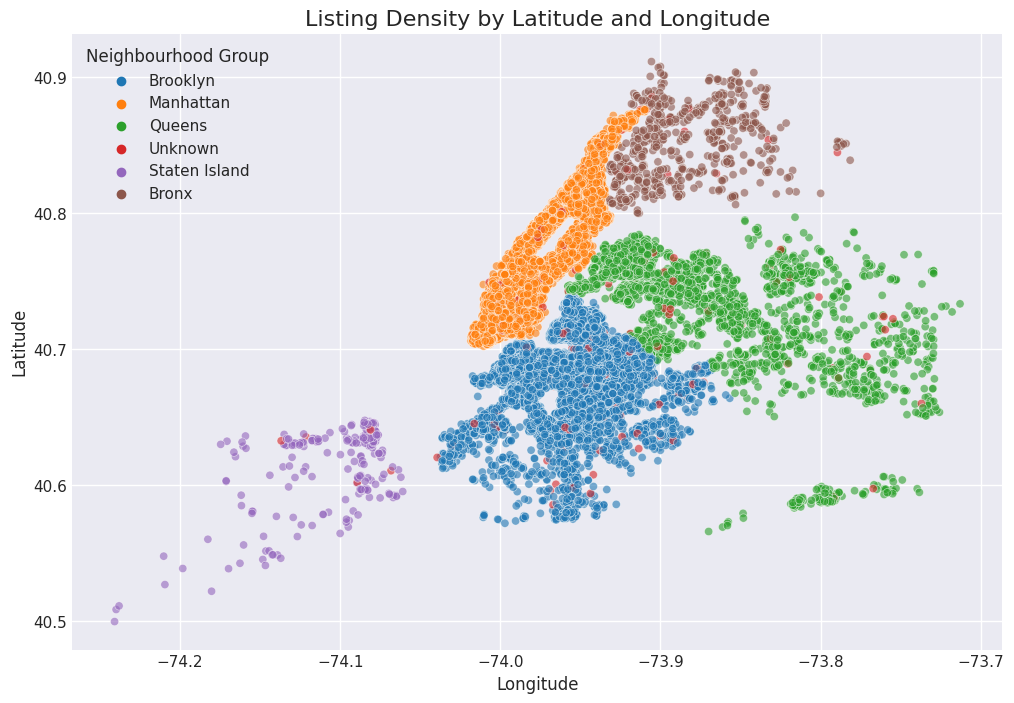

In [107]:
#Listing Density by Latitude and Longitude
plt.figure(figsize=(12, 8))
sns.scatterplot(x='long', y='lat', hue='neighbourhood_group', data=clean_data, alpha=0.6, palette='tab10')
plt.title('Listing Density by Latitude and Longitude', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.legend(title='Neighbourhood Group', loc='upper left')
plt.show()
